In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("iris_data.csv ")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [12]:
x=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df["species"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [17]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
dtree

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_pred=dtree.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [23]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred)) 

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


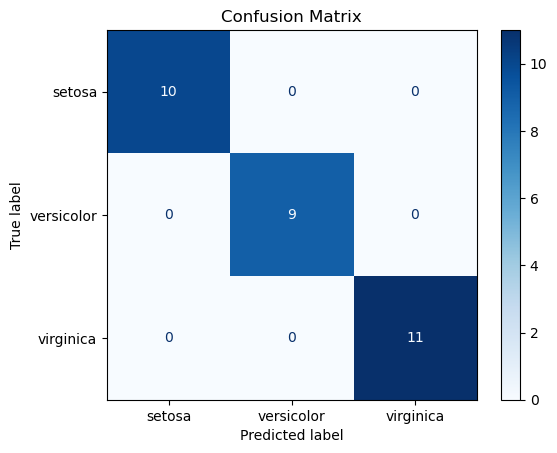

In [27]:
cm=confusion_matrix(y_test,y_pred)
cm
conf_matrix=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df["species"].unique())
conf_matrix
conf_matrix.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

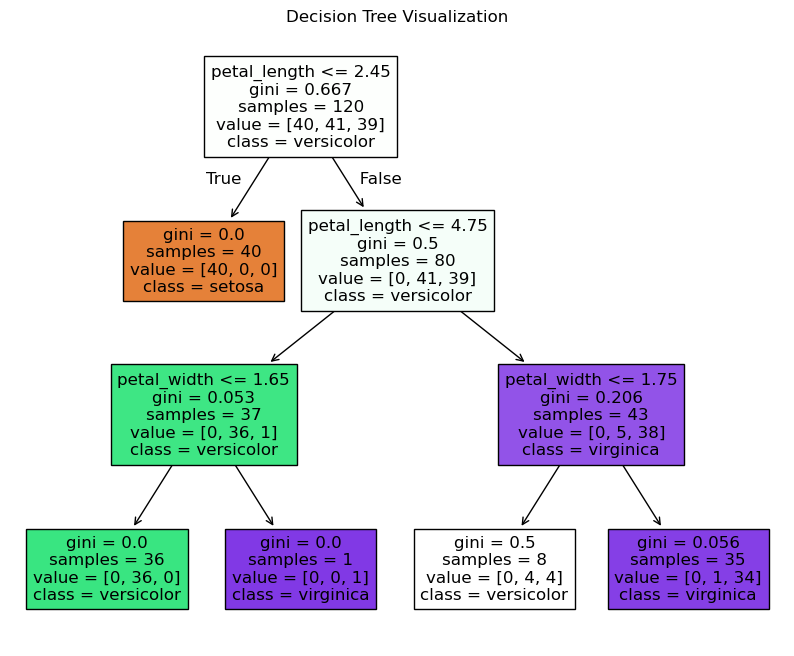

In [29]:
plt.figure(figsize=(10, 8))
tree.plot_tree(dtree, filled=True, feature_names=["sepal_length", "sepal_width", "petal_length", "petal_width"], 
               class_names=df["species"].unique())
plt.title("Decision Tree Visualization")
plt.show()